In [64]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Read file
df = pd.read_csv("Home_Loan_Dataset.csv")

In [66]:
# Print data types for each variable
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [67]:
# Shape of the dataset
df.shape

(614, 13)

Univariate analysis

In [68]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [69]:
# Normalize can be set to True to print proportions instead of number 
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

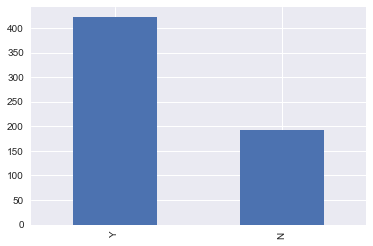

In [70]:
df['Loan_Status'].value_counts().plot.bar()

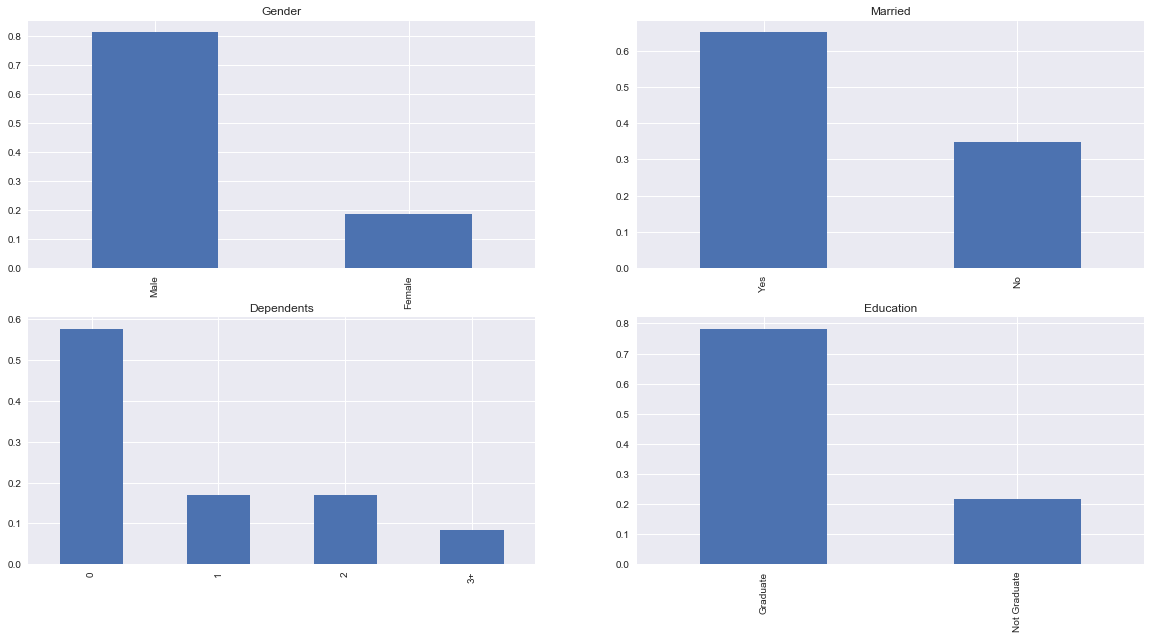

In [71]:
# Visualizing categorical features. Normalize = True is used to get proportions
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
df['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

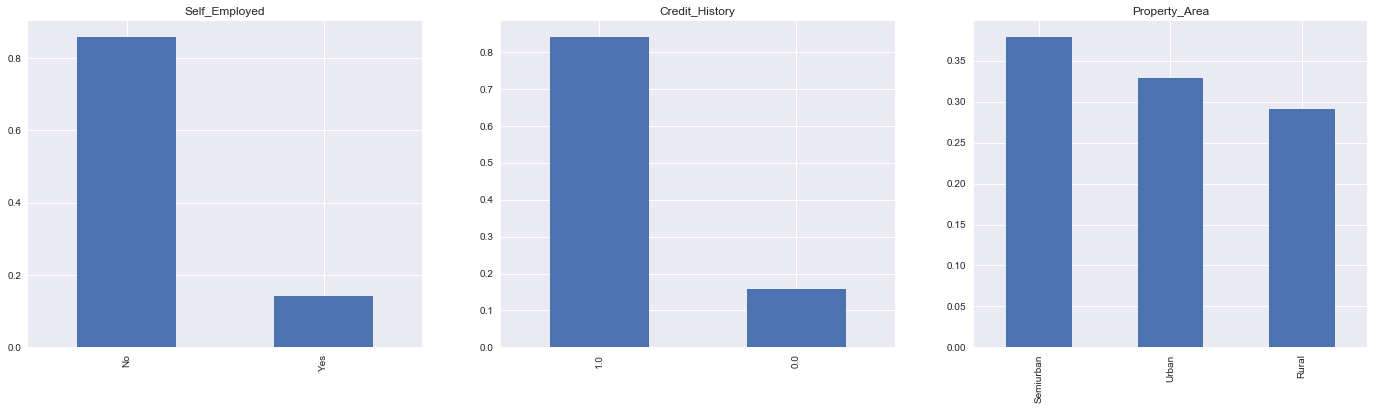

In [72]:
# Visualizing remaining categorical features
plt.figure(1)
plt.subplot(131)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

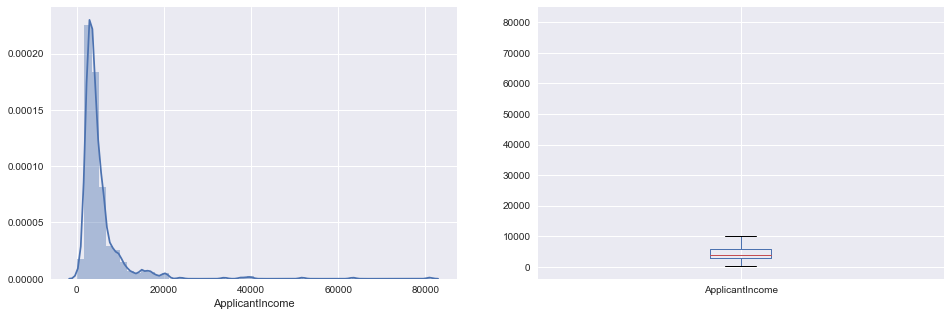

In [73]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

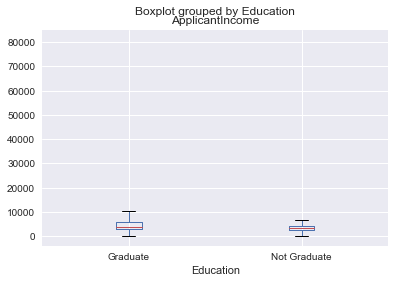

In [74]:
df.boxplot(column='ApplicantIncome', by = 'Education')

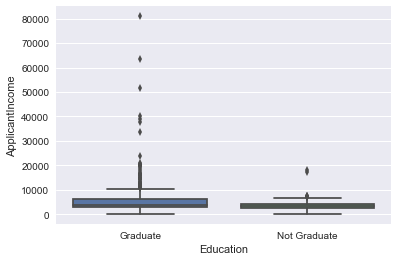

In [75]:
ax = sns.boxplot(x="Education", y="ApplicantIncome", data=df)
ax 

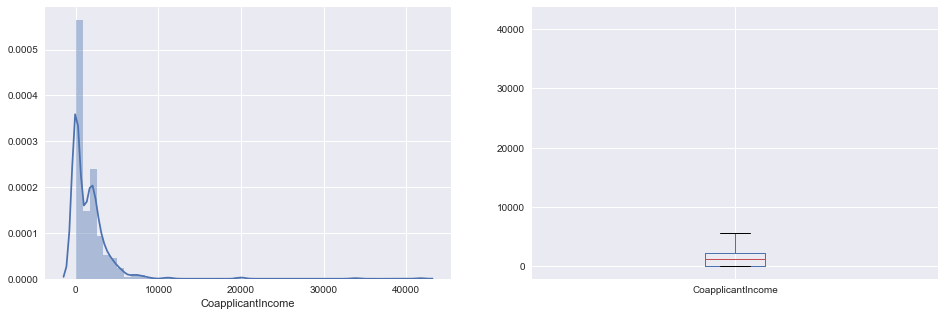

In [76]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

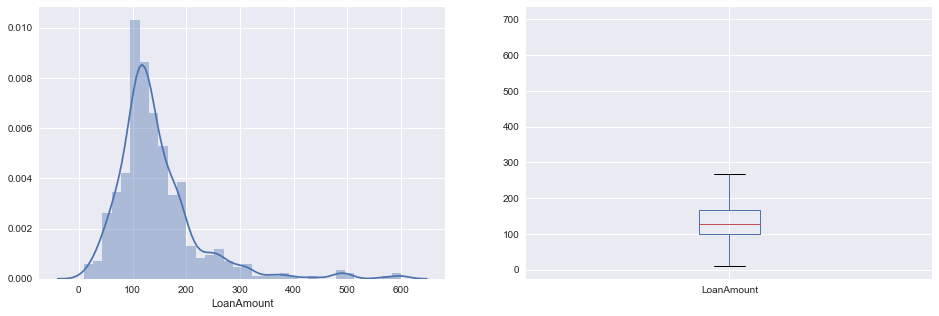

In [77]:
plt.figure(1)
plt.subplot(121)
df1=df.dropna()
sns.distplot(df1['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


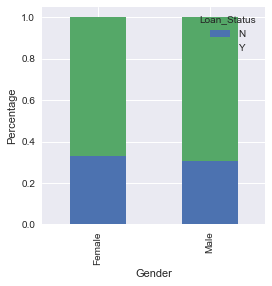

In [78]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


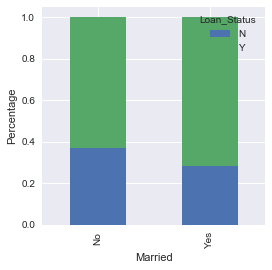

In [79]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


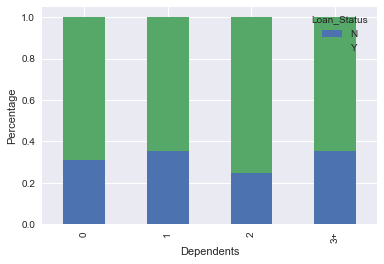

In [80]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


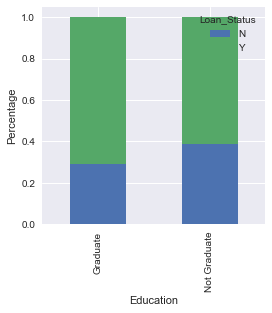

In [81]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


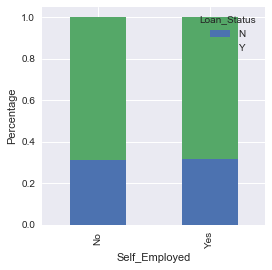

In [82]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


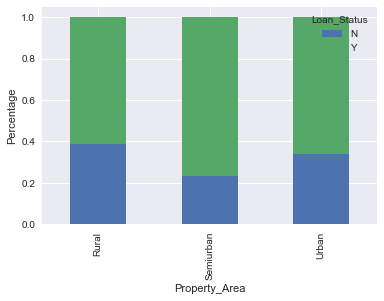

In [83]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [84]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df1['ApplicantIncome'],bins,labels=group)

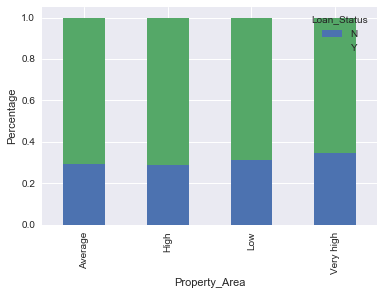

In [85]:
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [86]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_bin']=pd.cut(df1['LoanAmount'],bins,labels=group)

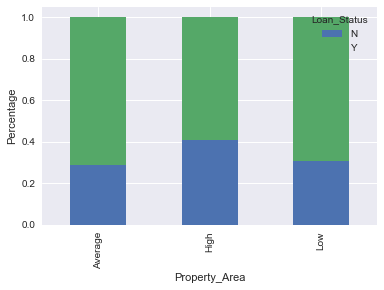

In [87]:
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [88]:
# Drop the new variable of bins
df=df.drop(['Income_bin', 'LoanAmount_bin'], axis=1)

In [89]:
# replacing 3+ in Dependents variable with 3
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


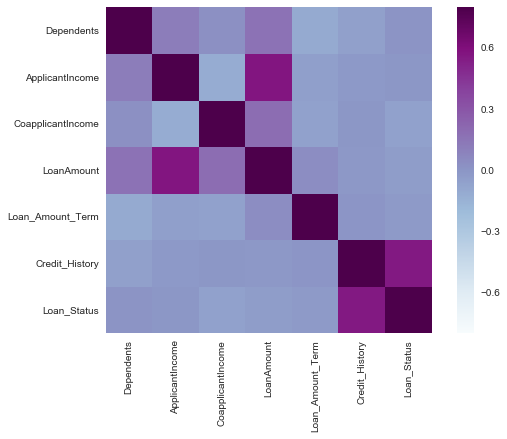

In [91]:
# Print correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Missing value and outlier treatment


In [92]:
# Checking the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# replacing the missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [94]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [95]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [96]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [97]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

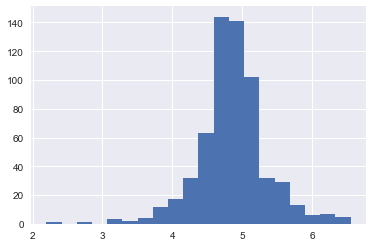

In [98]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [111]:
#Dropping Loand ID 
df=df.drop('Loan_ID',axis=1)


ValueError: labels ['Loan_ID'] not contained in axis

In [112]:
df=pd.get_dummies(df)

Building Model using Logistic regression

In [113]:
x = df.drop('Loan_Status',1)
y = df.Loan_Status

In [114]:
#To print many statements at the same time using below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [115]:
#Creating train and test data 75% and 25% split
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.15,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(521, 18)

(93, 18)

(521,)

(93,)

In [103]:
#Build a Logistic regression model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [104]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0.0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,4.867534
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [105]:
# Adding dummies to the dataset
#x=pd.get_dummies(x)
#df=pd.get_dummies(df)

In [106]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [107]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,130.0,360.0,1.0,4.867534,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,1,0,0,0,1


In [116]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
log.coef_

array([[ 9.86265453e-02,  4.45921513e-06, -5.46264735e-05,
         3.67952129e-04, -1.46628876e-03,  3.16218910e+00,
        -2.74767528e-01, -2.22461345e-02, -5.78325370e-02,
        -2.93139169e-01,  2.13060498e-01,  1.22986778e-01,
        -2.03065450e-01, -5.82141487e-03, -7.42572567e-02,
        -2.48028653e-01,  4.35042179e-01, -2.67092197e-01]])

In [119]:
#Generate Model Diagnostics
classes=log.predict(test_x)
print(classes.size)
print('Positive Cases in Test Data:',test_y[test_y==1].shape[0])
print('Negative Cases in Test Data:',test_y[test_y==0].shape[0])

93
Positive Cases in Test Data: 62
Negative Cases in Test Data: 31


In [120]:
acc_log = round(log.score(test_x, test_y)*100,2)
acc_log

79.57

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

In [123]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc_log=metrics.roc_auc_score(test_y,classes)
auc_log

Accuracy Score
0.7956989247311828
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.93      0.42      0.58        31
          1       0.77      0.98      0.87        62

avg / total       0.82      0.80      0.77        93

AUC


0.7016129032258065

In [127]:
prec_log=round(precision_score(test_y,classes),2)
prec_log
recall_log=round(recall_score(test_y,classes),2)
recall_log

0.77

0.98

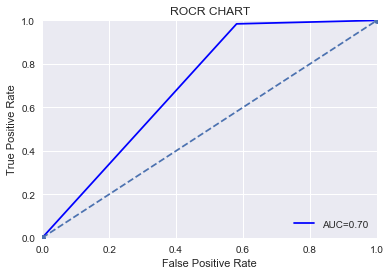

In [128]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


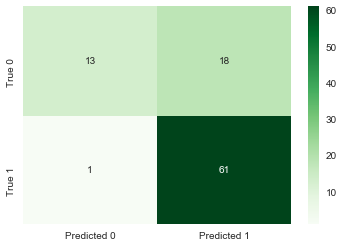

In [129]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();